# 1. Прогноз зарплати за досвідом роботи
- Ситуація:
    - HR-відділ хоче передбачити зарплату нового кандидата на основі його досвіду роботи.
    - Дані:
        - Досвід (років)   Зарплата (тис. грн)
        - 1                30
        - 2                35
        - 3                45
        - 4                50
        - 5                55
    - Завдання:
        - Побудуй просту модель регресії вручну, знайди w та b, та спрогнозуй зарплату для кандидата з 6 роками досвіду.

--- Наша Модель ---
Коефіцієнт w (нахил): 6.50
Коефіцієнт b (зсув): 23.50

Формула нашої моделі: Зарплата = 6.50 * Досвід + 23.50

--- Прогноз ---
Прогнозована зарплата для 6 років досвіду: 62.50 тис. грн


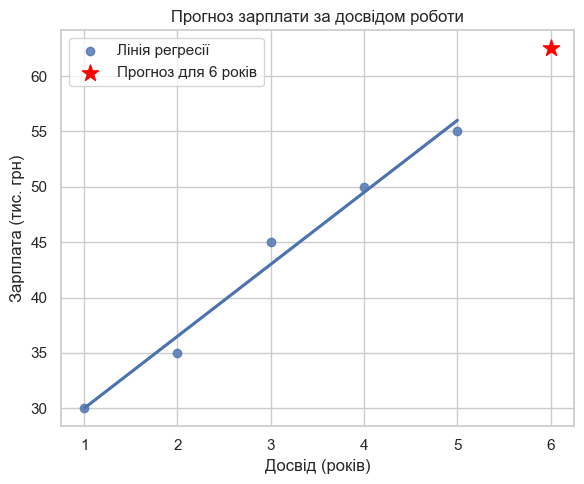

In [7]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'Досвід': [1, 2, 3, 4, 5],
    'Зарплата': [30, 35, 45, 50, 55]
})

w, b, r_value, p_value, std_err = stats.linregress(data['Досвід'], data['Зарплата'])

print(f"--- Наша Модель ---")
print(f"Коефіцієнт w (нахил): {w:.2f}")
print(f"Коефіцієнт b (зсув): {b:.2f}")
print(f"\nФормула нашої моделі: Зарплата = {w:.2f} * Досвід + {b:.2f}")

# Новий досвід
new_experience = 6

# Формула прогнозу
predicted_salary = w * new_experience + b

print(f"\n--- Прогноз ---")
print(f"Прогнозована зарплата для {new_experience} років досвіду: {predicted_salary:.2f} тис. грн")

# Створюємо графік
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 5))
sns.regplot(data=data, x='Досвід', y='Зарплата', ci=None, label='Лінія регресії')

# Точка нашого прогнозу
plt.scatter(new_experience, predicted_salary, color='red', s=150, zorder=5, 
            marker='*', label=f'Прогноз для {new_experience} років')

plt.title('Прогноз зарплати за досвідом роботи')
plt.xlabel('Досвід (років)')
plt.ylabel('Зарплата (тис. грн)')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Оцінка вартості квартири
- Ситуація:
    - Агентство нерухомості хоче прогнозувати ціну квартири за її площею.
    - Дані:
        - Площа (м²)   Ціна (тис. $)
        - 40           50
        - 60           70
        - 80           90
        - 100          110
        - 120          130
    - Завдання:
        - побудуй модель регресії,
        - спрогнозуй вартість квартири площею 85 м² 
        - візуалізуй результат.

--- Наша модель ---
Коефіцієнт w (ціна за м²): 1.00
Коефіцієнт b (базова вартість): 10.00

Формула нашої моделі: Ціна = 1.00 * Площа + 10.00

--- Прогноз нової квартири ---
Прогнозована вартість для квартири площею 85 м²: 95.00 тис. $


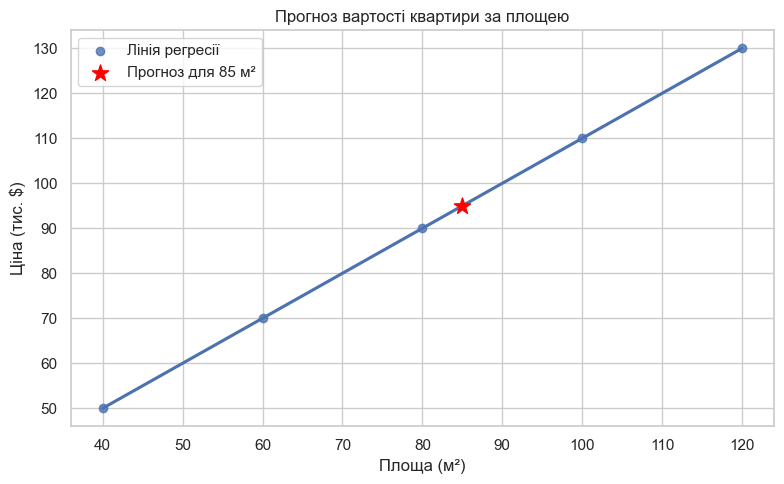

In [11]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'Площа': [40, 60, 80, 100, 120],
    'Ціна': [50, 70, 90, 110, 130]
})


w, b, _, _, _ = stats.linregress(data['Площа'], data['Ціна'])

print("--- Наша модель ---")
print(f"Коефіцієнт w (ціна за м²): {w:.2f}")
print(f"Коефіцієнт b (базова вартість): {b:.2f}")
print(f"\nФормула нашої моделі: Ціна = {w:.2f} * Площа + {b:.2f}")

# Площа нової квартири
new_area = 85
predicted_price = w * new_area + b

print(f"\n--- Прогноз нової квартири ---")
print(f"Прогнозована вартість для квартири площею {new_area} м²: {predicted_price:.2f} тис. $")


sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(data=data, x='Площа', y='Ціна', ci=None, label='Лінія регресії')

# Наш прогноз
plt.scatter(new_area, predicted_price, color='red', s=150, zorder=5, 
            marker='*', label=f'Прогноз для {new_area} м²')

plt.title('Прогноз вартості квартири за площею')
plt.xlabel('Площа (м²)')
plt.ylabel('Ціна (тис. $)')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Прогноз успішності студента (регресія з кількома змінними)
- Ситуація: 
    - Університет аналізує, як кількість годин навчання, сон і відвідуваність впливають на оцінку.
    - Дані:
        - Години навчання   Сон (год)   Відвідуваність (%)   Оцінка
        - 2                 6           80                   65
        - 3                 7           90                   75 
        - 5                 8           95                   90
    - Завдання: 
        - побудуй модель мультифакторної регресії, 
        - поясни вплив кожної змінної.

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Створюємо дані
data = pd.DataFrame({
    'Години_навчання': [2, 3, 5, 1, 4], 
    'Сон_год': [6, 7, 8, 5, 7],
    'Відвідуваність_%': [80, 90, 95, 70, 85],
    'Оцінка': [65, 75, 90, 55, 80]
})

feature_names = ['Години_навчання', 'Сон_год', 'Відвідуваність_%']

# Ознаки та ціль
X = data[feature_names]
y = data['Оцінка']

# Створюємо і навчаємо модель
model = LinearRegression()
model.fit(X, y)

w_coefficients = model.coef_
b_intercept = model.intercept_
coeffs_df = pd.DataFrame(w_coefficients, index=feature_names, columns=['Коефіцієнт_w'])

print("--- Вплив кожного фактора на оцінку ---")
print(coeffs_df)
print(f"\nБазова оцінка (b): {b_intercept:.2f}")

print("\n--- Інтерпретація ---")
for factor, row in coeffs_df.iterrows():
    w = row['Коефіцієнт_w']
    print(f"- Кожна додаткова '{factor}' в середньому змінює оцінку на {w:.2f} балів.")

# Новий студент 
new_student = np.array([[4, 6, 88]])
new_student_df = pd.DataFrame(new_student, columns=feature_names)

# Прогноз
predicted_grade = model.predict(new_student_df)

print("\n--- Прогноз для нового студента ---")
print(new_student_df.to_string(index=False))
print(f"Прогнозована оцінка: {predicted_grade[0]:.2f}")

--- Вплив кожного фактора на оцінку ---
                  Коефіцієнт_w
Години_навчання       5.996016
Сон_год               2.011952
Відвідуваність_%      0.199203

Базова оцінка (b): 25.00

--- Інтерпретація ---
- Кожна додаткова 'Години_навчання' в середньому змінює оцінку на 6.00 балів.
- Кожна додаткова 'Сон_год' в середньому змінює оцінку на 2.01 балів.
- Кожна додаткова 'Відвідуваність_%' в середньому змінює оцінку на 0.20 балів.

--- Прогноз для нового студента ---
 Години_навчання  Сон_год  Відвідуваність_%
               4        6                88
Прогнозована оцінка: 78.59


# 4. Порівняй якість двох моделей у продажах
- Ситуація: 
    - Компанія будує дві моделі для прогнозу продажів: 
        - одна використовує тільки рекламу, 
        - інша — рекламу + сезонність. 
    - Завдання: 
        - Порахуй MAE, MSE, R² для обох моделей. 
        - Зроби висновки, яка точніша.

In [1]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Справжні продажі
actual_sales = np.array([100, 120, 150, 90, 110])

# Прогнози моделі "Реклама"
model_ad_predictions = np.array([95, 115, 140, 85, 105])

# Прогнози моделі "Реклама + Сезонність"
model_ad_season_predictions = np.array([102, 122, 148, 92, 108])

print("--- Оцінка Моделі 'Реклама' ---")
mae_ad = mean_absolute_error(actual_sales, model_ad_predictions)
mse_ad = mean_squared_error(actual_sales, model_ad_predictions)
r2_ad = r2_score(actual_sales, model_ad_predictions)
print(f"MAE (Реклама): {mae_ad:.2f}")
print(f"MSE (Реклама): {mse_ad:.2f}")
print(f"R² (Реклама): {r2_ad:.4f}") 

print("\n--- Оцінка Моделі 'Реклама + Сезонність' ---")
mae_ad_season = mean_absolute_error(actual_sales, model_ad_season_predictions)
mse_ad_season = mean_squared_error(actual_sales, model_ad_season_predictions)
r2_ad_season = r2_score(actual_sales, model_ad_season_predictions)
print(f"MAE (Реклама + Сезонність): {mae_ad_season:.2f}") 
print(f"MSE (Реклама + Сезонність): {mse_ad_season:.2f}")
print(f"R² (Реклама + Сезонність): {r2_ad_season:.4f}") 

--- Оцінка Моделі 'Реклама' ---
MAE (Реклама): 6.00
MSE (Реклама): 40.00
R² (Реклама): 0.9057

--- Оцінка Моделі 'Реклама + Сезонність' ---
MAE (Реклама + Сезонність): 2.00
MSE (Реклама + Сезонність): 4.00
R² (Реклама + Сезонність): 0.9906


- MAE та MSE: Чим менші ці числа, тим ліпше!
    - Прогнозист "Реклама + Сезонність" має MAE 2.00 та MSE 4.00, що набагато менше, ніж у Прогнозиста "Реклама" (6.00 та 40.00).
    - Це означає, що Прогнозист "Реклама + Сезонність" помиляється менше.
- R²: Чим ближче до 1, тим ліпше!
    - Прогнозист "Реклама + Сезонність" має R² 0.9906, що дуже близько до 1.
    - Прогнозист "Реклама" має 0.9057.
    - Це означає, що Прогнозист "Реклама + Сезонність" набагато ліпше пояснює, чому відбуваються продажі.